In [1]:
#univariate time series
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [2]:
def prepare_data(timeseries_data, n_steps):
  X, y = [], []
  for i in range(len(timeseries_data)):
    end_ix = i + n_steps
    if end_ix > len(timeseries_data)-1:
      break
    seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
    X.append(seq_x)
    y.append(seq_y)
  return np.array(X), np.array(y)

In [3]:
timeseries_data = [110, 125, 133, 146, 158, 172, 187, 196, 210]

n_steps = 3

X, y = prepare_data(timeseries_data, n_steps)

In [6]:
print(X)

[[110 125 133]
 [125 133 146]
 [133 146 158]
 [146 158 172]
 [158 172 187]
 [172 187 196]]


In [7]:
print(y)

[146 158 172 187 196 210]


In [8]:
X.shape

(6, 3)

In [9]:
y.shape

(6,)

In [10]:
#reshape from [samples, timesteps] to [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
X.shape

(6, 3, 1)

In [17]:
#Building a simple LSTM Network

model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
#fit model
model.fit(X, y, epochs = 300, verbose=1)

Epoch 1/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 31049.5996
Epoch 2/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 30162.2422
Epoch 3/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 29321.3750
Epoch 4/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 28438.5020
Epoch 5/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 27529.2500
Epoch 6/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 26652.2246
Epoch 7/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 25860.3125
Epoch 8/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 25165.2891
Epoch 9/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 24609.3418
Epoch 10/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 24105.0371
Epoch 11/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 23582.6152
Epoch 12/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 23027.6074
Epoch 13/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 22441.0625
Epoch 14/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 21825.8477
Epoch 15/300
1/1 ━━━━━━━━━━━━━━

In [18]:
#10 predictions
x_input = np.array([187, 196, 210])
temp_input = list(x_input)
lst_output=[]
i=0

while(i<10):

  if(len(temp_input)>3):
    x_input = np.array(temp_input[1:])
    print("{} day input {}".format(i,x_input))
    x_input = x_input.reshape((1, n_steps, n_features))
    yhat = model.predict(x_input, verbose=1)
    print("{} day input {}".format(i,yhat))
    temp_input.append(yhat[0][0])
    temp_input=temp_input[1:]
    lst_output.append(yhat[0][0])
    i=i+1
  else:
    x_input = x_input.reshape((1, n_steps, n_features))
    yhat = model.predict(x_input, verbose = 1)
    print(yhat[0])
    temp_input.append(yhat[0][0])
    lst_output.append(yhat[0][0])
    i=i+1

print(lst_output)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step
[223.80504]
1 day input [196.         210.         223.80503845]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step
1 day input [[234.0814]]
2 day input [210.         223.80503845 234.08140564]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
2 day input [[248.42708]]
3 day input [223.80504 234.0814  248.42708]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
3 day input [[262.4953]]
4 day input [234.0814  248.42708 262.4953 ]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
4 day input [[275.21283]]
5 day input [248.42708 262.4953  275.21283]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
5 day input [[290.7564]]
6 day input [262.4953  275.21283 290.7564 ]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
6 day input [[306.18875]]
7 day input [275.21283 290.7564  306.18875]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
7 day input [[321.5859]]
8 day input [290.7564  306.18875 321.5859 ]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
8 day input [[338.96024]]
9 day input [306.18875 321.5859  338.96024]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0

In [19]:
import matplotlib.pyplot as plt

In [20]:
day_new = np.arange(1,10)
day_pred = np.arange(10,20)

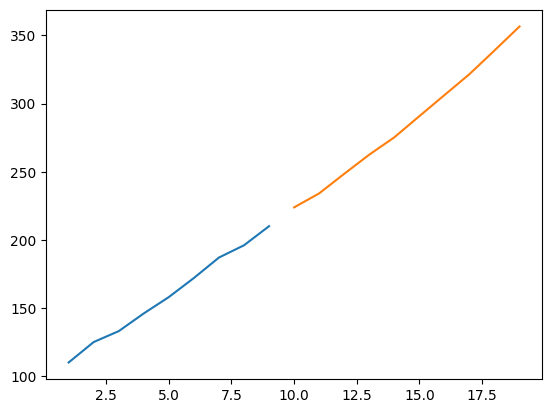

In [21]:
plt.plot(day_new, timeseries_data)
plt.plot(day_pred,lst_output)